In [1]:
# LIBRERIAS
import matplotlib

import numpy as np
import matplotlib.pylab as plt

import pandas as pd

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#plt.style.use('Solarize_light2')
import seaborn as sns
import os
#to en otra carpeta

path=os.getcwd()
sns.set_theme()

$$ P=\frac{\alpha \times \Delta \lambda \times \sum_{i}A_{i} }{ActRes}

In [2]:
Pot=np.array([76.033,75.858,75.589,75.162,75.336,81.283,71.450,59.566,59.234,71.945,86.099])*1e-6
etiqueta=['04','05','06','07','08','10','11','12','14','15','16']
alpha=[]


for c,i in enumerate(etiqueta):


    path_r=path+'/Cal_pot/'+'WaveData20230303_0'+i+'.csv'
    arch=pd.read_csv(path_r,on_bad_lines='skip',skiprows=3)
    act_res=float(arch.at['Actual Resolution','Trace'][0])
    delta_wl=float(arch.at['Resolution','Trace'][0])
    arch=pd.read_csv(path_r,on_bad_lines='skip',skiprows=120)
    power=np.array(arch['Level(A)'][:])*1e-3*20 
    alpha.append(Pot[c]*act_res/(delta_wl*sum(power)))


In [3]:
alpha=np.average(alpha)
paths_amps=[]
for i in range(0,38):
    if i==0:
        for j in range(2,50):
        
            paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')

    else:
        for j in range(0,50):
        
            paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')
 


In [4]:
Pot_med=[]
Pot_med_S1=[]
Pot_med_S2=[]

for filename in paths_amps:

    arch=pd.read_csv(path+'/Pulsos_amp/'+filename,on_bad_lines='skip',skiprows=2)
    act_res=float(arch.at[6,'1471.1'])
    delta_wl=float(arch.at[5,'1471.1'])
    df_S= pd.read_csv(path+'/Pulsos_amp/'+filename,skiprows=27)
    power_P=np.array(df_S['1749.9'][:])*20
    Pot_med.append(alpha*sum(power_P)*delta_wl/act_res)

In [5]:
paths_amps=[]
for i in range(0,38):
    for j in range(0,50):
        paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')
 

for filename in paths_amps:


    arch=pd.read_csv(path+'/Supercontinuo_1/'+filename,on_bad_lines='skip',skiprows=2)
    act_res=float(arch.at[6,'1471.1'])
    delta_wl=float(arch.at[5,'1471.1'])
    df_S= pd.read_csv(path+'/Supercontinuo_1'+'/'+filename,skiprows=27)
    power_P=np.array(df_S['1749.9'][:])*20
    Pot_med_S1.append(alpha*sum(power_P)*delta_wl/act_res)
    


for filename in paths_amps:


    arch=pd.read_csv(path+'/Supercontinuo_2/'+filename,on_bad_lines='skip',skiprows=2)
    act_res=float(arch.at[6,'1471.1'])
    delta_wl=float(arch.at[5,'1471.1'])
    df_S= pd.read_csv(path+'/Supercontinuo_2'+'/'+filename,skiprows=27)
    power_P=np.array(df_S['1749.9'][:])*20
    Pot_med_S2.append(alpha*sum(power_P)*delta_wl/act_res)

In [6]:
Pot_med=[4.13]+[4.13]+Pot_med

In [7]:
new_patt=path+'/Potencia/'
df_p1=pd.read_csv(new_patt+'DATA FRAME_16FEB0.csv')
p1_tet1=np.array(df_p1['Theta1'][:])
p1_tet2=np.array(df_p1['Theta2'][:])
p1_tet3=np.array(df_p1['Theta3'][:])
p1_pow1=np.array(df_p1['Power'][:])
p1_anch=np.array(df_p1['Ancho_espectral'][:])

df_p2=pd.read_csv(new_patt+'DATA FRAME_16FEB_1.csv')
p2_tet1=np.array(df_p2['Theta1'][:])
p2_tet2=np.array(df_p2['Theta2'][:])
p2_tet3=np.array(df_p2['Theta3'][:])
p2_pow1=np.array(df_p2['Power'][:])
p2_anch=np.array(df_p2['Ancho_espectral'][:])

df_p3=pd.read_csv(new_patt+'DATA FRAME_16FEB2.csv')
p3_tet1=np.array(df_p3['Theta1'][:])
p3_tet2=np.array(df_p3['Theta2'][:])
p3_tet3=np.array(df_p3['Theta3'][:])
p3_pow1=np.array(df_p3['Power'][:])
p3_anch=np.array(df_p3['Ancho_espectral'][:])

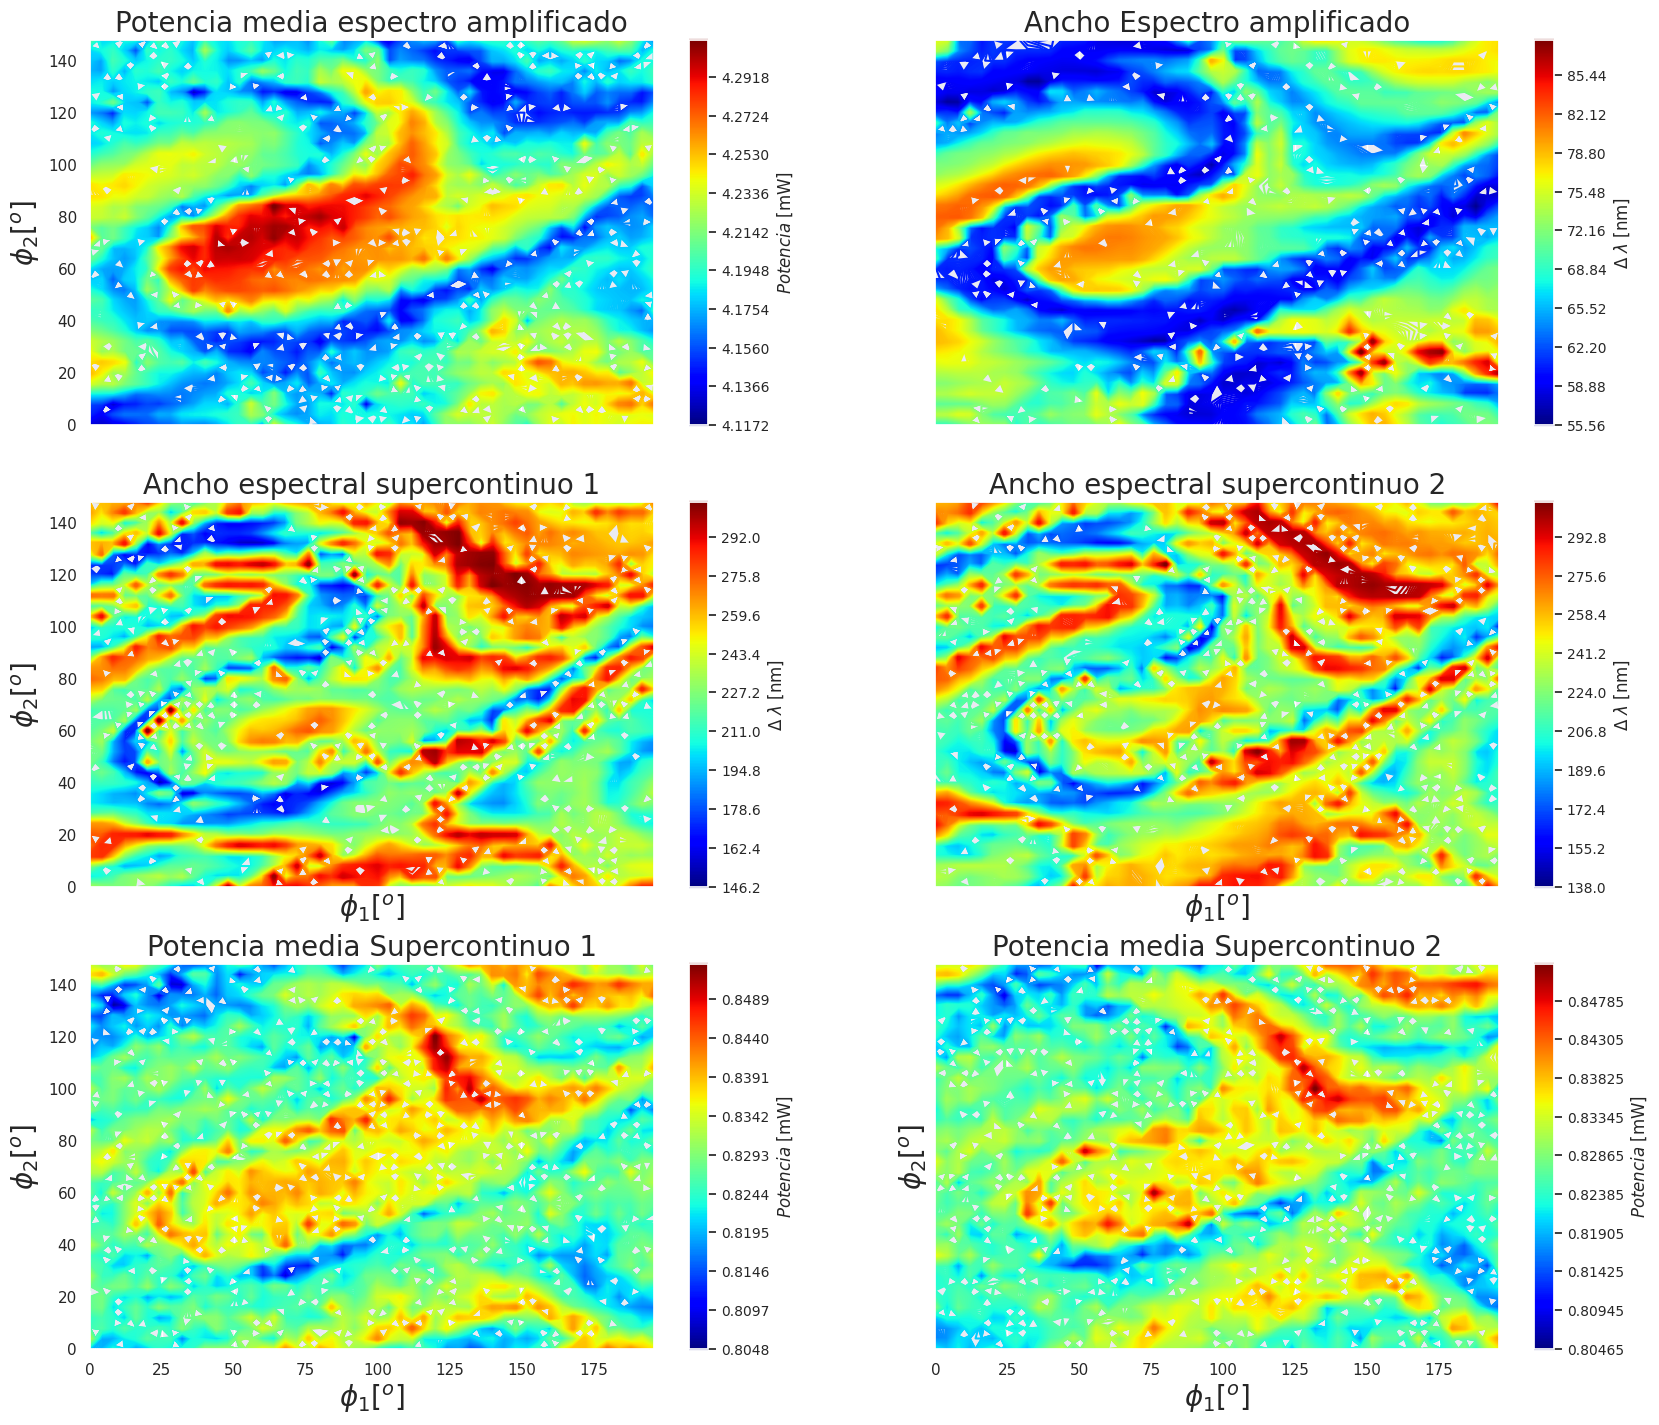

In [10]:
fig1, axs = plt.subplots(nrows=3,ncols=2, figsize=(20,17),sharex='col', sharey='row')
(ax1, ax2), (ax3, ax4) ,(ax5,ax6) = axs

power1=np.reshape(Pot_med,(38,50)) 
anch1=np.reshape(p1_anch,(38,50)) 
anch2=np.reshape(p2_anch,(38,50)) 
anch3=np.reshape(p3_anch,(38,50)) 
power_S1=np.reshape(Pot_med_S1,(38,50)) 
power_S2=np.reshape(Pot_med_S2,(38,50)) 

X=np.arange(0,4*50,4)
Y=np.arange(0,4*(38),4)
X,Y = np.meshgrid(X,Y)

plt.rcParams['figure.figsize'] = 24, 17 # para modificar el tamaño de la figura
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

font = {'weight' : 'bold',
        'size'   : 17}


cs1=ax1.contour(X, Y, power1,1000,cmap="jet")
ax1.set_ylabel("$\phi_{2} [^o]$",fontsize=20)
ax1.set_title("Potencia media espectro amplificado",fontsize=20)
plt.colorbar(cs1,label="$Potencia$ [mW]")

cs2=ax2.contour(X, Y, anch1,1000,cmap="jet")
plt.colorbar(cs2,label="$\Delta$ $\lambda$ [nm]")
ax2.set_title("Ancho Espectro amplificado",fontsize=20)

#ax2.colorbar(cs,label="$Potencia$ [W]")

cs3=ax3.contour(X, Y, anch2,1000,cmap="jet")
ax3.set_xlabel("$\phi_{1} [^o]$",fontsize=20)
ax3.set_ylabel("$\phi_{2} [^o]$",fontsize=20)
plt.colorbar(cs3,label="$\Delta$ $\lambda$ [nm]")
ax3.set_title("Ancho espectral supercontinuo 1",fontsize=20)
#ax3.colorbar(cs,label="$Potencia$ [W]")

cs4=ax4.contour(X, Y, anch3,1000,cmap="jet")
ax4.set_xlabel("$\phi_{1} [^o]$",fontsize=20)
plt.colorbar(cs4,label="$\Delta$ $\lambda$ [nm]")
ax4.set_title("Ancho espectral supercontinuo 2",fontsize=20)
#ax4.colorbar(cs,label="$Potencia$ [W]")

cs5=ax5.contour(X, Y, power_S1,1000,cmap="jet")
ax5.set_xlabel("$\phi_{1} [^o]$",fontsize=20)
ax5.set_ylabel("$\phi_{2} [^o]$",fontsize=20)
ax5.set_title("Potencia media Supercontinuo 1",fontsize=20)
plt.colorbar(cs5,label="$Potencia$ [mW]")

#ax3.colorbar(cs,label="$Potencia$ [W]")

cs6=ax6.contour(X, Y, power_S2,1000,cmap="jet")
ax6.set_xlabel("$\phi_{1} [^o]$",fontsize=20)
ax6.set_ylabel("$\phi_{2} [^o]$",fontsize=20)
ax6.set_title("Potencia media Supercontinuo 2",fontsize=20)
plt.colorbar(cs6,label="$Potencia$ [mW]")

In [9]:
power

array([ 3.890e-10, -5.054e-10, -1.434e-10, ...,  4.762e-10,  5.326e-10,
       -8.104e-10])